In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip),'cats_and_dogs_filtered')

68616192/68606236 [==============================] - 0s 0us/step


In [3]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation


In [4]:
#cat training
train_cats_dir = os.path.join(train_dir, 'cats')
print(train_cats_dir)

#dog training
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_dogs_dir)

#cat validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
print(validation_cats_dir)

#dog validation
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_dogs_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/train/dogs
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [6]:
#train 데이터와 validation 데이터 개수 
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print('--')

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images : ', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dogs images:', num_dogs_val)

print('--')

total_train = num_cats_tr + num_dogs_tr
print("Total train images: ", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images :  500
total validation dogs images: 500
--
Total train images:  2000
Total validation images: 1000


In [31]:
# 파라미터 설정 
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [32]:
#데이터 시각화 함수 
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5, figsize = (10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [33]:
#데이터 증강 
image_gen_train = ImageDataGenerator(rescale = 1./255,
                                    rotation_range = 0.3,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    vertical_flip = False)

In [34]:
train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size,
                                                    directory = train_dir,
                                                    shuffle = True,
                                                    target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [35]:
#확인
train_data_gen[0][0].shape

(16, 256, 256, 3)

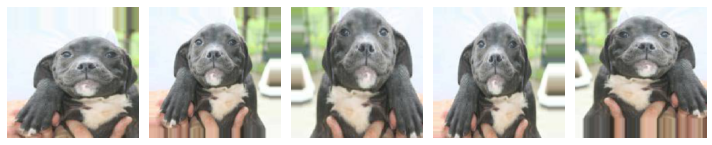

In [37]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [40]:
#validation data
image_gen_val = ImageDataGenerator(rescale=1./255)

In [41]:
val_data_gen = image_gen_val.flow_from_directory(batch_size = batch_size, 
                                                directory = validation_dir,
                                                target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                class_mode = 'binary')

Found 1000 images belonging to 2 classes.


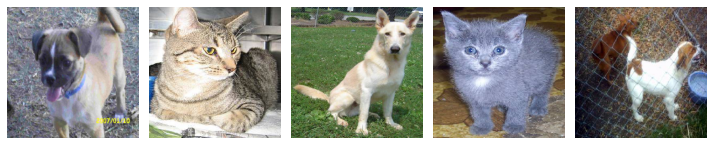

In [42]:
sample_training_images, _= next(val_data_gen)
plotImages(sample_training_images[:5])

In [44]:
#정답 데이터
_[:5]

array([1., 0., 1., 0., 1.], dtype=float32)

In [63]:
#VGG16 모델 구현 

import tensorflow as tf
from tensorflow.keras import layers, models

input_layer=tf.keras.layers.Input(shape=(256, 256, 3))
x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1024, activation='relu')(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()




Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 256, 256, 32)      9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 128, 128, 64)      36928 

In [64]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

In [65]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/5
125/125 [==============================] - 93s 274ms/step - loss: 42.3363 - binary_accuracy: 0.4985 - val_loss: 0.8139 - val_binary_accuracy: 0.4950
Epoch 2/5
125/125 [==============================] - 32s 255ms/step - loss: 0.7090 - binary_accuracy: 0.5065 - val_loss: 0.6953 - val_binary_accuracy: 0.4980
Epoch 3/5
125/125 [==============================] - 32s 255ms/step - loss: 0.6944 - binary_accuracy: 0.4975 - val_loss: 0.6931 - val_binary_accuracy: 0.5030
Epoch 4/5
125/125 [==============================] - 32s 255ms/step - loss: 0.7800 - binary_accuracy: 0.4990 - val_loss: 0.6933 - val_binary_accuracy: 0.5000
Epoch 5/5
125/125 [==============================] - 32s 255ms/step - loss: 0.6930 - binary_accuracy: 0.4925 - val_loss: 0.6947 - val_binary_accuracy: 0.5020


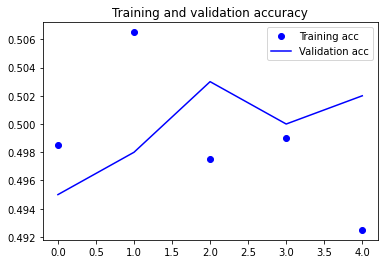

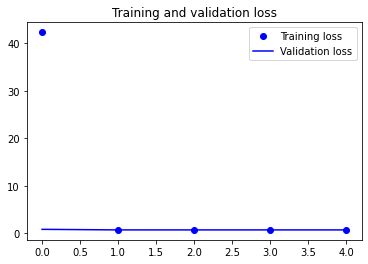

In [66]:
acc = history.history ['binary_accuracy']
val_acc = history.history ['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history ['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label = 'Training acc')
plt.plot(epochs_range, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label= 'Training loss')
plt.plot(epochs_range, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [69]:
#하이퍼파라미터 설정 
batch_size = 32
epochs = 10
LEARNING_RATE = 0.001
OPTIMIZER = 'adam'
LOSS_FUNCTION = 'categorical_crossentropy'
METRICS = ['accuracy']

In [70]:
#데이터 generator 설정
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

In [71]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [72]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [73]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [74]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_layer=tf.keras.layers.Input(shape=(256, 256, 3))
x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1024, activation='relu')(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 256, 256, 32)      9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 128, 128, 64)      3692

In [75]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

In [76]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/10
62/62 [==============================] - 37s 508ms/step - loss: 67.2566 - binary_accuracy: 0.4750 - val_loss: 0.6981 - val_binary_accuracy: 0.5010
Epoch 2/10
62/62 [==============================] - 32s 507ms/step - loss: 0.7084 - binary_accuracy: 0.4870 - val_loss: 0.8268 - val_binary_accuracy: 0.5000
Epoch 3/10
62/62 [==============================] - 32s 504ms/step - loss: 0.7264 - binary_accuracy: 0.4875 - val_loss: 0.6953 - val_binary_accuracy: 0.5000
Epoch 4/10
62/62 [==============================] - 32s 504ms/step - loss: 0.6989 - binary_accuracy: 0.4735 - val_loss: 0.6927 - val_binary_accuracy: 0.5010
Epoch 5/10
62/62 [==============================] - 32s 503ms/step - loss: 0.6931 - binary_accuracy: 0.5000 - val_loss: 0.6943 - val_binary_accuracy: 0.5010
Epoch 6/10
62/62 [==============================] - 32s 506ms/step - loss: 0.7260 - binary_accuracy: 0.4800 - val_loss: 0.6972 - val_binary_accuracy: 0.4990
Epoch 7/10
62/62 [==============================] - 32s 5

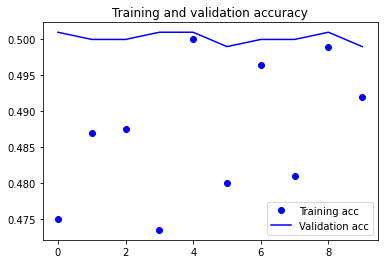

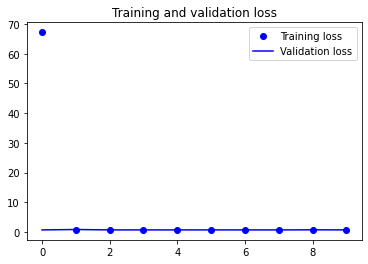

In [77]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

2. Faster RCNN

In [1]:
!pip3 install tensorflow-estimator==2.6.0

In [3]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

import time

In [4]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

In [5]:
def download_and_resize_image(url, new_width=256, new_height=256, display=False): 
  
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data) 
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) 
  pil_image_rgb = pil_image.convert("RGB")
  pil_image_rgb.save(filename, format="JPEG", quality=90) 
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

In [6]:
def draw_bounding_box_on_image(image, 
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

# BBox 테두리 그리기
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

In [7]:
# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1): 
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

# BBox 그리기 적용
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

Image downloaded to /tmp/tmpz0e7q3nr.jpg.


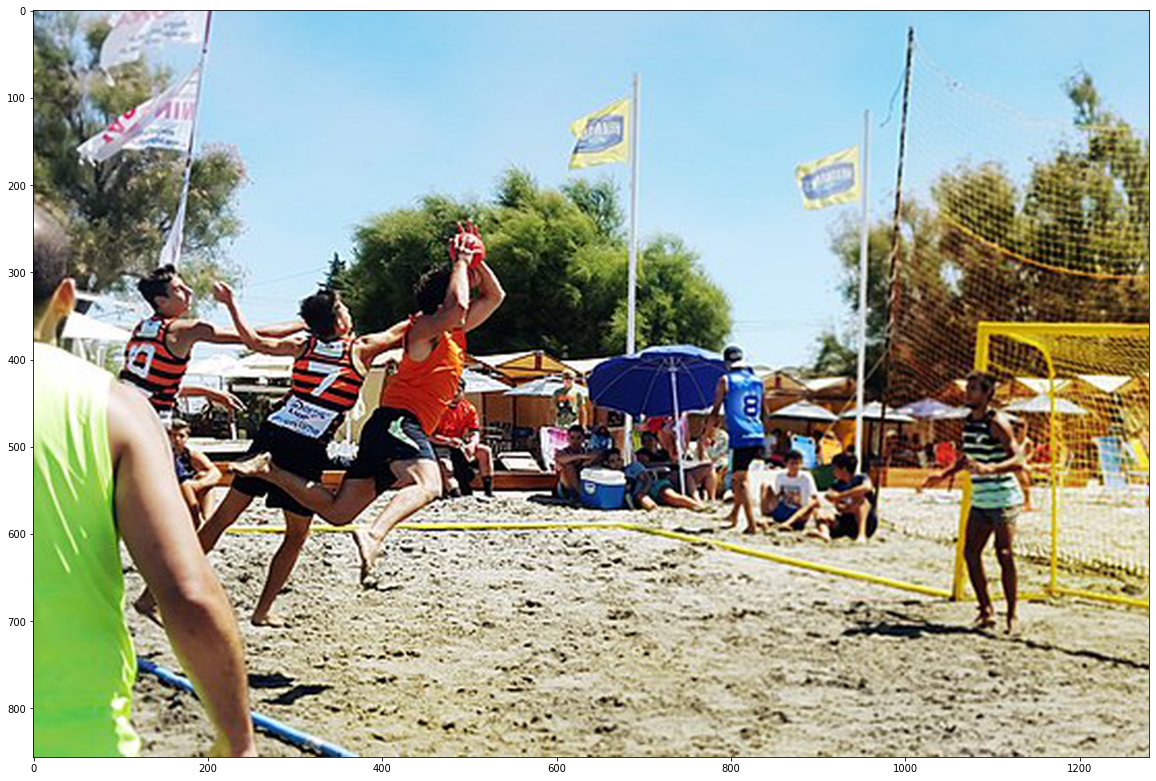

In [8]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Torneo_beach_handball.jpg/640px-Torneo_beach_handball.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)

In [9]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"  

detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [10]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [11]:
def run_detector(detector, path):
  img = load_img(path) 

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

# 이미지 내 박스로 entity, scores를 추가하여 출력
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

Found 100 objects.
Inference time:  90.35658574104309


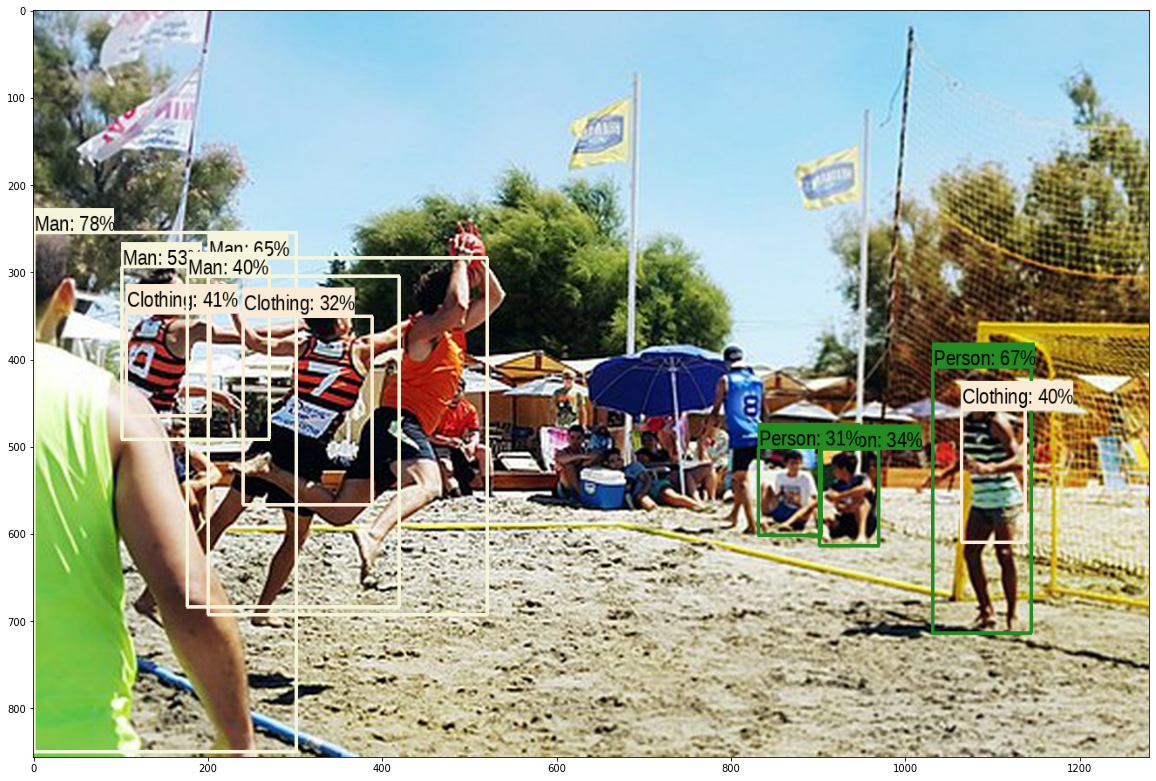

In [12]:
run_detector(detector, downloaded_image_path)

커널이 자꾸 죽어서 더이상 진행을 못했습니다............................  
-매우 낡고 지친 자- 